In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set() # устанавливаем seaborn как по-умолчанию для отрисовки графиков

In [2]:
df = pd.read_csv('spaceship.csv')
df.head(100)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0103_01,Earth,False,F/24/S,TRAPPIST-1e,24.0,False,0.0,NaN,0.0,0.0,17.0,Arlen Mclainez,True
96,0103_02,Earth,True,G/18/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Shaele Mclainez,True
97,0103_03,Earth,True,G/18/S,TRAPPIST-1e,6.0,False,0.0,0.0,0.0,0.0,0.0,Fanne Mclainez,False
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False


In [3]:
# Разделение столбца на три новых столбца
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)

# Удаление исходного столбца "Column", если это не требуется
df.drop(columns=['Cabin'], inplace=True)


In [4]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [5]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Num             199
Side            199
dtype: int64

In [6]:
nan_df = (df.isnull().mean() * 100).reset_index()
#Преобразуем этот датафрейм в более изящный вид:
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
#Выведем квантили:
intro_srt = "Number of columns with more than"
for percent in (10, 5, 3, 2, 1):
    print(f"{intro_srt} {percent}% NANs: {(nan_df.percentage > percent).sum()}")

Number of columns with more than 10% NANs: 0
Number of columns with more than 5% NANs: 0
Number of columns with more than 3% NANs: 0
Number of columns with more than 2% NANs: 14
Number of columns with more than 1% NANs: 14


In [7]:
#Выведем столбцы с более чем 1 % NaN - в
nan_columns = list(nan_df[nan_df.percentage > 1]['column_name'])
nan_columns

['CryoSleep',
 'ShoppingMall',
 'VIP',
 'HomePlanet',
 'Name',
 'Deck',
 'Num',
 'Side',
 'VRDeck',
 'FoodCourt',
 'Spa',
 'Destination',
 'RoomService',
 'Age']

In [8]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'Deck', 'Num', 'Side'],
      dtype='object')

In [9]:
# Замена Nan
mass = ['HomePlanet','CryoSleep','Deck', 'Num', 'Side','Spa', 'VRDeck', 'Name','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall']
for i in mass:
    df[i].fillna(df[i].mode()[0], inplace=True)

df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Deck            0
Num             0
Side            0
dtype: int64

In [10]:
num_df = df.select_dtypes(exclude=['object'])
cat_df = df.select_dtypes(include=['object'])
cat_df.columns

Index(['PassengerId', 'HomePlanet', 'Destination', 'Name', 'Deck', 'Num',
       'Side'],
      dtype='object')

In [11]:
unique_counts = df.nunique()
print(unique_counts)

PassengerId     8693
HomePlanet         3
CryoSleep          2
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
Deck               8
Num             1817
Side               2
dtype: int64


In [12]:
df.drop(['PassengerId', 'Name','Num','ShoppingMall'], axis= 1 , inplace= True)

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categ = ['HomePlanet', 'CryoSleep','Deck', 'Side', 'Destination', 'VIP','Transported']
df[categ] = df[categ].apply(label_encoder.fit_transform)
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,Spa,VRDeck,Transported,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0,1,0
1,0,0,2,24.0,0,109.0,9.0,549.0,44.0,1,5,1
2,1,0,2,58.0,1,43.0,3576.0,6715.0,49.0,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,3329.0,193.0,0,0,1
4,0,0,2,16.0,0,303.0,70.0,565.0,2.0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,1643.0,74.0,0,0,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0,6,1
8690,0,0,2,26.0,0,0.0,0.0,1.0,0.0,1,6,1
8691,1,0,0,32.0,0,0.0,1049.0,353.0,3235.0,0,4,1


In [14]:
unique_counts = df.nunique()
print(unique_counts)

HomePlanet        3
CryoSleep         2
Destination       3
Age              80
VIP               2
RoomService    1273
FoodCourt      1507
Spa            1327
VRDeck         1306
Transported       2
Deck              8
Side              2
dtype: int64


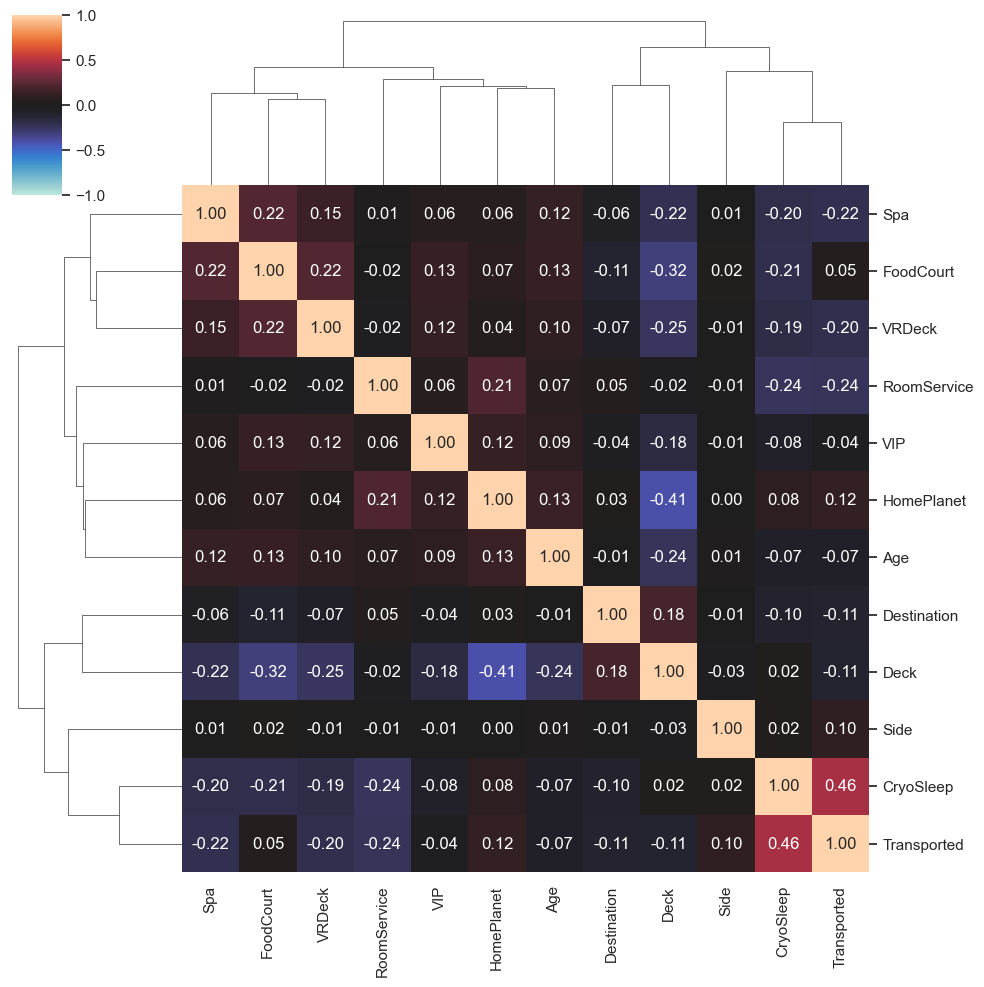

In [15]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        fmt=".2f",
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )

corrplot(df, annot=True)

In [16]:
unique_counts = df.nunique()
print(unique_counts)

HomePlanet        3
CryoSleep         2
Destination       3
Age              80
VIP               2
RoomService    1273
FoodCourt      1507
Spa            1327
VRDeck         1306
Transported       2
Deck              8
Side              2
dtype: int64


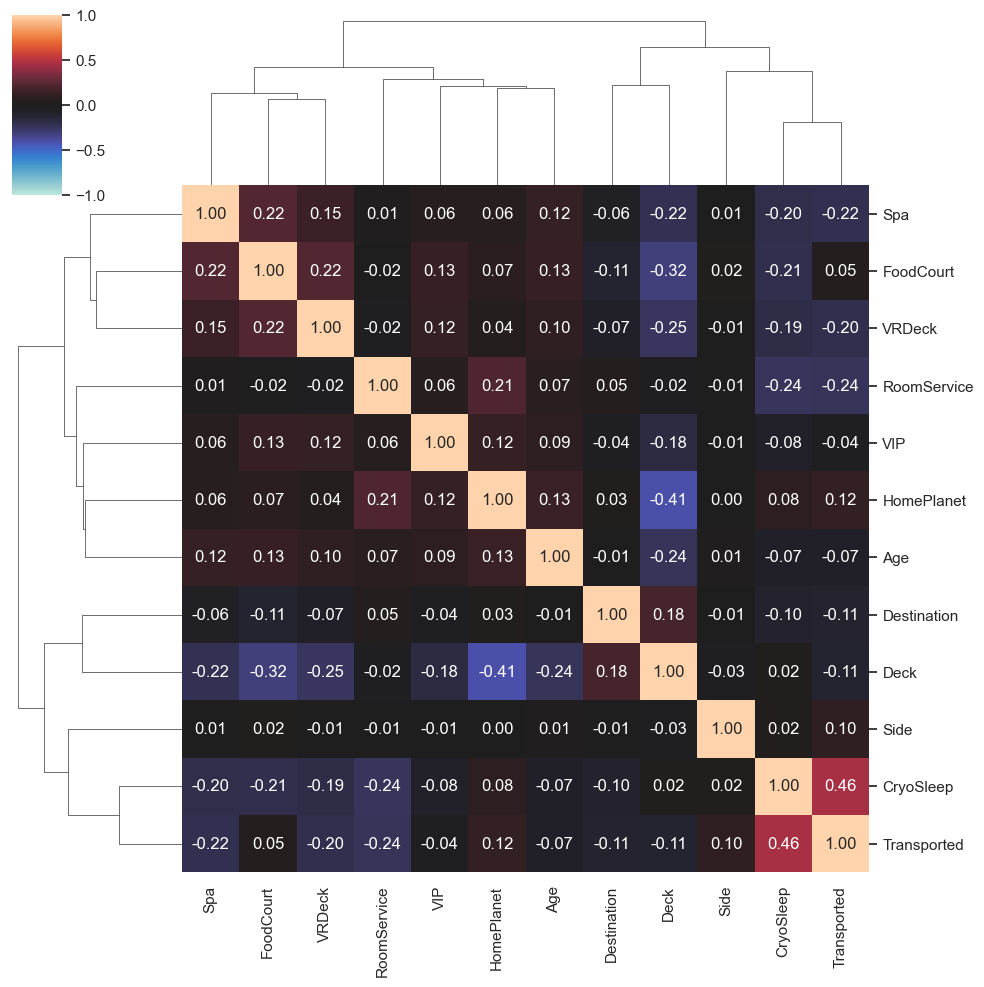

In [17]:
corrplot(df, annot=True)

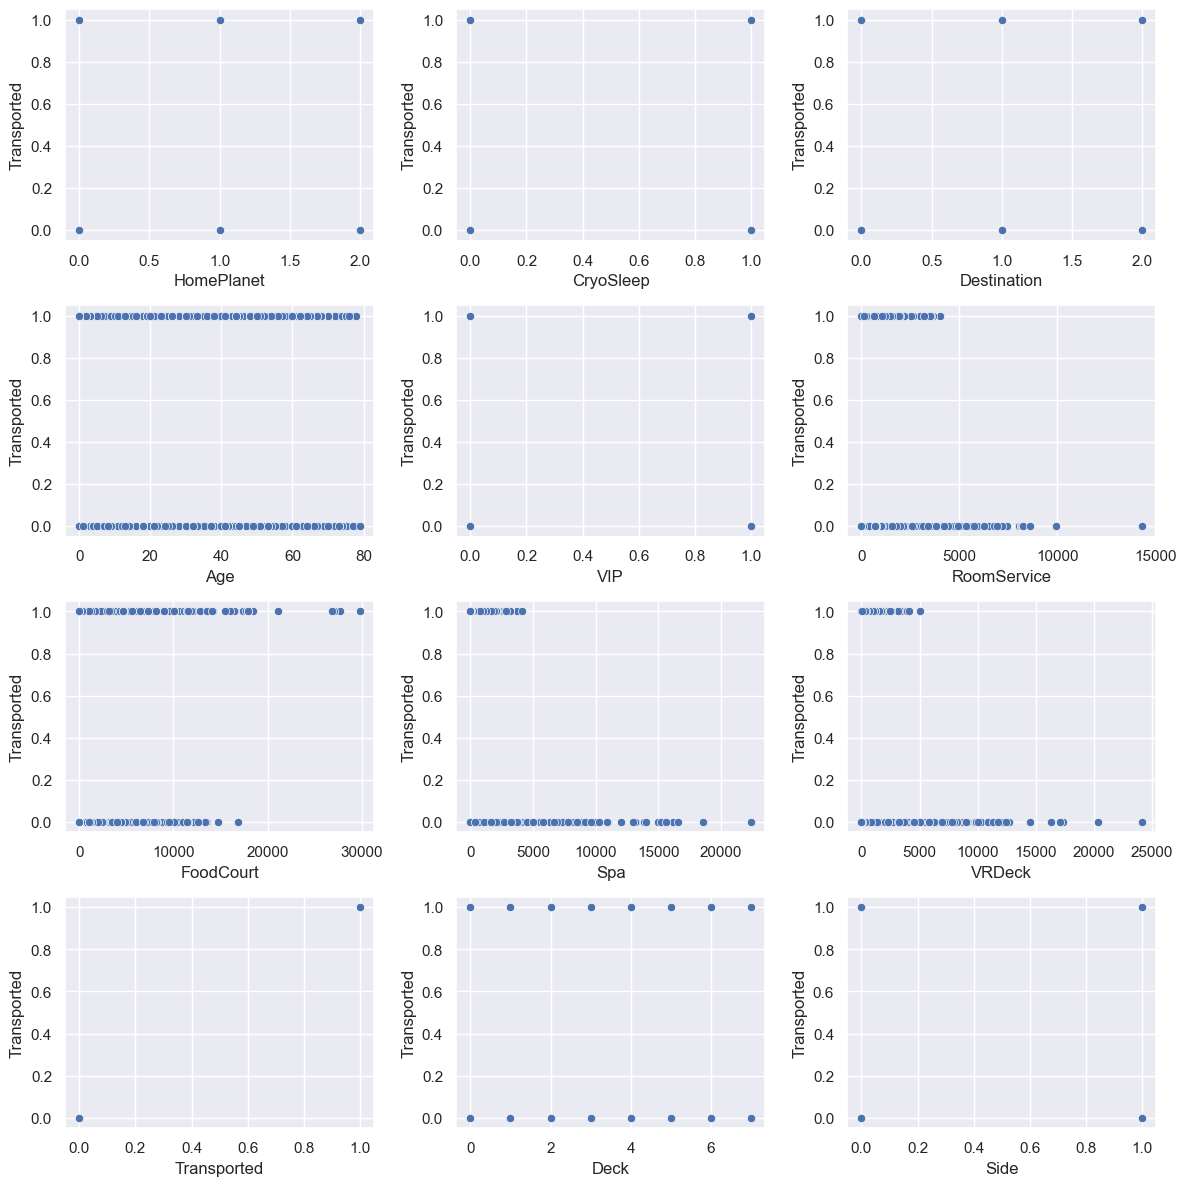

In [18]:
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
axes_flattened = axes.reshape(-1)
for i in range(len(df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=df.iloc[:, i],
        y='Transported',
        data=df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

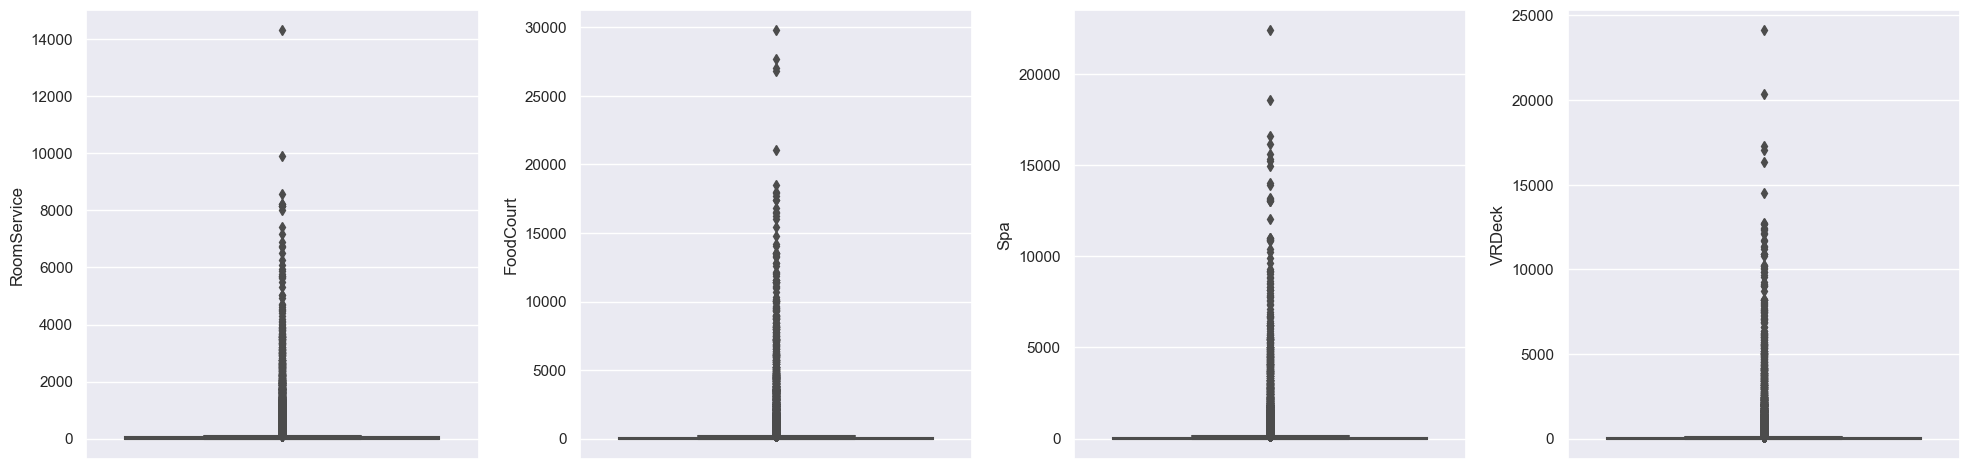

In [19]:
out_col = ['RoomService', 'FoodCourt', 'Spa', 'VRDeck']

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=df[col], data=df, ax=ax)
fig.tight_layout(pad=1.5)

In [20]:
for col, upper_bound in (
        ('RoomService', 9000),
        ('FoodCourt', 20000),
        ('Spa', 18000),
        ('VRDeck', 18000),
):
    df = df.drop(df[df[col] > upper_bound].index)

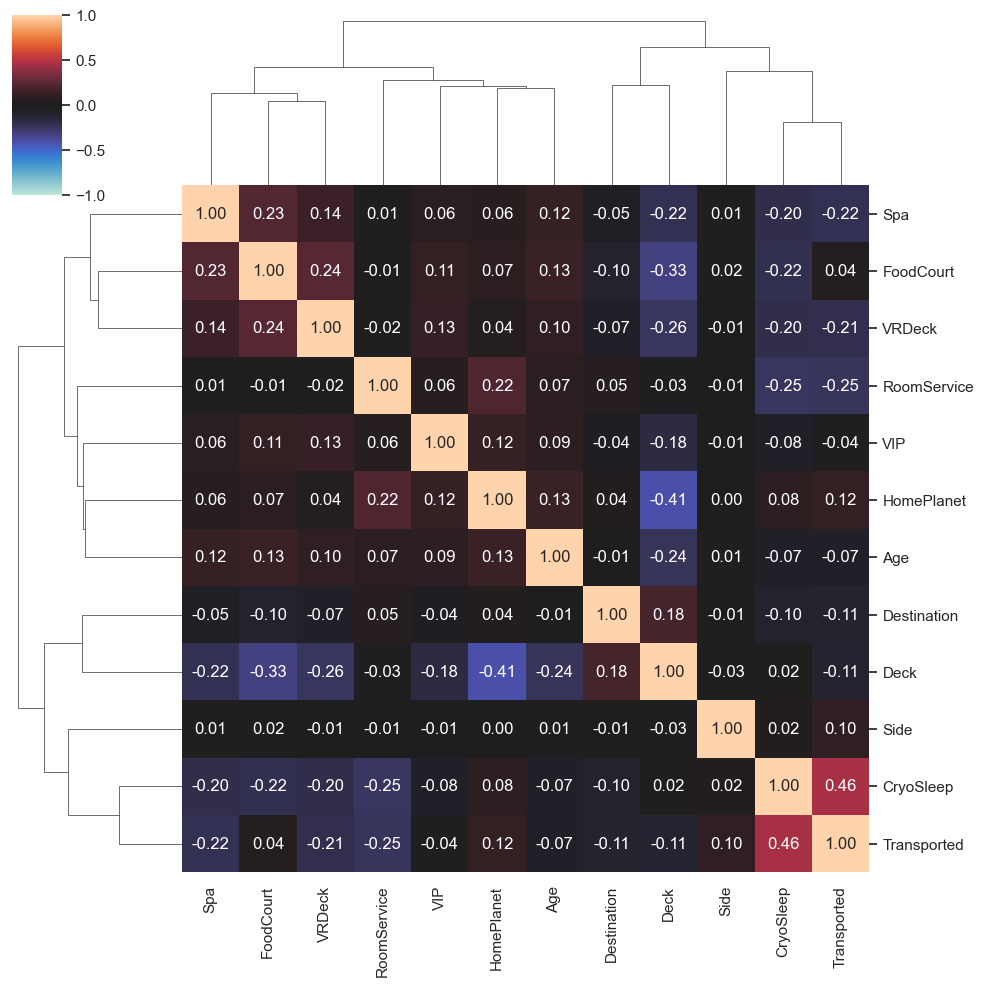

In [21]:
corrplot(df, annot=True)

In [22]:
# Сохраняем DataFrame в CSV файл
df.to_csv('spaceship2.csv', index=False)

In [23]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,Spa,VRDeck,Transported,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0,1,0
1,0,0,2,24.0,0,109.0,9.0,549.0,44.0,1,5,1
2,1,0,2,58.0,1,43.0,3576.0,6715.0,49.0,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,3329.0,193.0,0,0,1
4,0,0,2,16.0,0,303.0,70.0,565.0,2.0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,1643.0,74.0,0,0,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0,6,1
8690,0,0,2,26.0,0,0.0,0.0,1.0,0.0,1,6,1
8691,1,0,0,32.0,0,0.0,1049.0,353.0,3235.0,0,4,1


# Резюме

#### Пустые данные в столбцах были заменены на самые частотные значения.
#### Признак 'Cabin' был разделён на 3 части deck/num/side.
#### Не коррелирующими с признаком Transported являются 'PassengerId', 'Name','Num','ShoppingMall'. Они были удалены из датасета.
#### Сильно коррелирующими являются CryoSleep, Spa, VRDeck, RoomService, HomePlanet, Destination, Deck, Side
#### У признаков 'RoomService', 'FoodCourt', 'Spa', 'VRDeck' были обрезаны отклонения, что повысило корреляцию на несколько сотых у признаков RoomService и VrDesk

